Solution and answers to homework questions by:  dnnfisher, 26 JUN 2020

In [1]:
import numpy
import sympy
from matplotlib import pyplot
sympy.init_printing()

The equations of motion for a rocket in purely vertical flight are given by:<br>
<br>$$
\begin{align}
\frac{dh}{dt} &= v\\
(m_{s} + m_{p})\frac{dv}{dt} &= -(m_{s} + m_{p})g + \dot{m}_{p}v_{e}
- \frac{1}{2}\rho v\lvert v\rvert A C_{D}
\end{align}
$$<br>
$\bullet \; h = \;$ rocket altitude<br>
$\bullet \; m_{s} = 50 \; kg \;$ mass of rocket shell<br>
$\bullet \; g = 9.81 \; m/s^{2} \;$ acceleration due to gravity<br>
$\bullet \; \rho = 1.091 \; kg/m^{3} \;$ average air density (assumed constant throughout flight)<br>
$\bullet \; A = \pi r^{2} \;$ rocket maximum cross sectional area, where $\; r = 0.5 m$<br>
$\bullet \; v_{e} = 325 \; m/s \;$ exhaust speed<br>
$\bullet \; C_{D} = 0.15 \;$ drag coefficient<br>
$\bullet \; m_{p0} = 100 \; kg \;$ at time $\; t = 0 \;$ initial mass of rocket propellant<br>
<br>The mass of the remaining propellant is given by:<br>
<br>$$m_{p} = m_{p0} - \int_0^t \dot{m}_{p} d\tau$$<br>
<br>where $\; \dot{m}_{p} \;$ is the time-varying burn rate given by the following figure:<br>

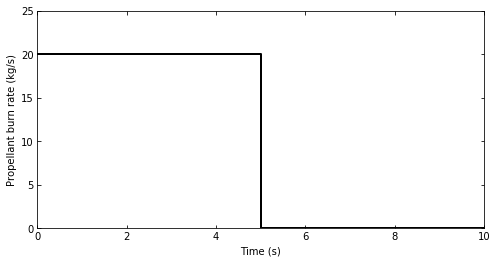

In [2]:
time = [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10]
burn_rate = [20, 20, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0]
pyplot.figure(figsize=(8.0, 4.0))
pyplot.xlabel('Time (s)')
pyplot.ylabel('Propellant burn rate (kg/s)')
pyplot.tick_params(direction='in', top=True, right=True)
pyplot.xlim(0, 10)
pyplot.ylim(0, 25)
pyplot.plot(time, burn_rate, color='k', linewidth=2);

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 5 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$<br>
Using Euler's method with a timestep of $\Delta t = 0.1 \; s $ , create a Python script to calculate
the altitude and velocity of the rocket from launch to splash down.<br>
<br>Using the code results, answer questions from the homework assignment concerning the flight of the rocket.

In [3]:
# Parameters
m_s = 50.0  # rocket shell mass (kg)
m_p0 = 100.0  # initial propellant mass (kg)
h0 = 0.0  # height above ground (m)
v0 = 0.0  # initial rocket velocity (m/s)
g = 9.81  # gravitational acceleration (m/s**2)
𝜌 = 1.091  # air density (kg/m**3)
r = 0.5  # cross section radius of rocket shell (m)
A = numpy.pi * r**2  # cross section area of rocket shell (m**2)
v_e = 325.0  # Exhaust velocity (m/s)
CD = 0.15  # Drag coefficient (dimensionless)

In [4]:
def euler_step(u, f, dt, *args):
    """
    Returns solution at next time-step using Euler's method
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time-step
        as a list or 1D array of four floats
    f : function
        Function to compute right-hand side of system of equations
    dt : float
         Time-step size
    args : tuple, optional
           Positional arguments to pass to function f
    Returns
    -------
    u_new : numpy.ndarray
            Solution at next time-step as 1D array of floats
    """
    u_new = u + dt * f(u, *args)
    return u_new

In [5]:
def rhs_rocket(u, m_dot_p, 𝜌, A, CD, g, v_e):
    """
    Returns the right-hand side of the rocket system of equations
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time-step
        as a list or 1D array of four floats
    m_dot_p : float
              propellant mass burn rate
    𝜌 : float
        air density
    A : float
        cross section area of rocket shell
    CD : float
         Drag coefficient
    g : float
        Gravitational acceleration
    v_e : float
          Exhaust velocity
         
    Returns
    -------
    rhs : numpy.ndarray
          Right-hand side of system of equations
          as a 1D array of four floats
    """
    m_p, h, v = u  # State vector: propellant mass, height, velocity
    # rhs = derivatives of u
    rhs = numpy.array([-m_dot_p,
                       v,
                      -g + (m_dot_p * v_e - 0.5 * 𝜌 * v * abs(v) * A * CD) / (m_s + m_p)])
    return rhs

In [6]:
T = 37.2  # length of time interval
dt = 0.1  # time-step size
N = int(T / dt) + 1  # number of time-steps
t = numpy.linspace(0, T, N)

# Create array to store solution at each time-step
u = numpy.empty((N, 3))
time = numpy.empty((N, 1))
# Set initial conditions
u[0] = numpy.array([m_p0, h0, v0])
time[0] = 0.0

# Time integration using Euler's method
for n in range(N-1):
    time[n] = n * dt
    if time[n] < 5.0:
        m_dot_p = 20.0
    else:
        m_dot_p = 0.0
    u[n+1] = euler_step(u[n], rhs_rocket, dt, m_dot_p, 𝜌, A, CD, g, v_e)
    #if u[n+1][1] < -0.1:
    #    break
print(N)    
print(n, time[n], u[n][1])

373
371 [37.1] -2.4585813061592443


In [7]:
# Get rocket fuel, height, and velocity over time
fuel = u[:, 0]
height = u[:, 1]
velocity = u[:, 2]

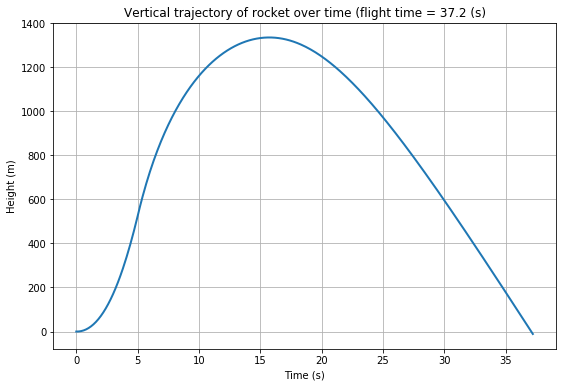

In [8]:
# Plot vertical trajectory of rocket
pyplot.figure(figsize=(9.0, 6.0))
pyplot.title('Vertical trajectory of rocket over time (flight time = {} (s)'.format(T))
pyplot.xlabel('Time (s)')
pyplot.ylabel('Height (m)')
pyplot.grid()
pyplot.plot(t, height, linestyle='-', linewidth=2);

At $t = 3.2 s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

In [9]:
print('t = {}s fuel remaining = {}kg'.format(t[32], fuel[32]))

t = 3.2s fuel remaining = 36.0kg


What is the maximum speed of the rocket (in m/s)? (Answer to 2 decimal places)

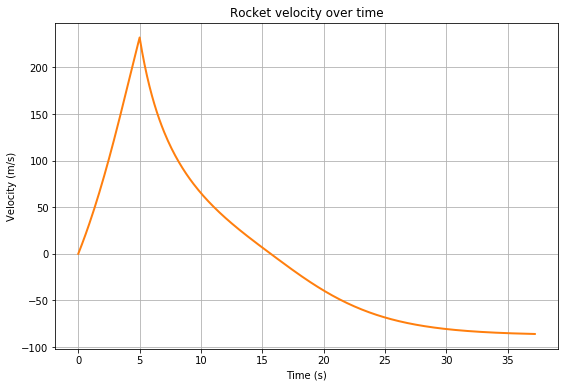

In [10]:
# Plot rocket velocity vs time
pyplot.figure(figsize=(9.0, 6.0))
pyplot.title('Rocket velocity over time')
pyplot.xlabel('Time (s)')
pyplot.ylabel('Velocity (m/s)')
pyplot.grid()
pyplot.plot(t, velocity, color='C1', linestyle='-', linewidth=2);

In [19]:
print('Maximum speed is {:.2f}m/s'.format(max(velocity)))
print(velocity[45:55])

Maximum speed is 232.11m/s
[205.9079751  211.21910476 216.50173172 221.7487622  226.95279618
 232.10613341 224.20078161 216.75907327 209.73913679 203.1040191 ]


At what time does maximum speed occur (in seconds)?  (Answer to 2 decimal places)

In [12]:
nums = [0, 1, 2, 5, 4, 3]
print(nums.index(max(nums)))
result = numpy.where(velocity==velocity.max())
print(result)
print(velocity[50])
print('Time of maximum speed occurs at {:.2f}s'.format(t[50]))

3
(array([50], dtype=int64),)
232.1061334126179
Time of maximum speed occurs at 5.00s


What is the altitude (in meters) at this time? (Answer to 2 decimal places)

In [13]:
print('Altitude at {:.2f}s is {:.2f}m'.format(t[50], height[50]))

Altitude at 5.00s is 523.52m


What is the rocket's maximum altitude (in meters) during the flight? (Answer to 2 decimal places)

In [14]:
print('Rocket maximum altitude is {:.2f}m'.format(max(height)))

Rocket maximum altitude is 1334.18m


At what time (in seconds) does maximum altitude occur? (Answer to 2 decimal places)

In [15]:
print(numpy.where(height==height.max()))
print('Maximum altitude occurs at t = {:.2f}s'.format(t[157]))

(array([157], dtype=int64),)
Maximum altitude occurs at t = 15.70s


At what time (in seconds) does the rocket impact the ground? (Answer to 2 decimal places)

In [16]:
print(numpy.where(height<=0.0))
print('The rocket impacts the ground at t = {:.2f}s'.format(t[371]))
print('Computed height at index {} is {}m'.format(371, height[371]))

(array([  0,   1, 371, 372], dtype=int64),)
The rocket impacts the ground at t = 37.10s
Computed height at index 371 is -2.4585813061592443m


What is the rocket velocity (in m/s) at time of impact? (Answer to 2 decimal places)

In [17]:
print('At time of impact, the rocket velocity is {:.2f}m/s'.format(velocity[371]))

At time of impact, the rocket velocity is -86.01m/s


In [18]:
velocity[365:]

array([-85.81050995, -85.84508352, -85.87889431, -85.91195882,
       -85.94429327, -85.97591348, -86.00683498, -86.03707297])